In [1]:
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("APCA_API_KEY")
alpaca_secret_key = os.getenv("APCA_API_SECRET")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2")

In [4]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'NoneType'>
Alpca Secret Key type: <class 'NoneType'>


In [5]:
current_date = pd.Timestamp("2019-10-30", tz="America/New_York").isoformat()

tickers = ["FB", "AAPL", "AMZN", "NFLX", "GOOGL"]

timeframe = "1D"

In [6]:
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=current_date
).df

df_ticker

AAPL                                         \
                             open     high       low    close     volume   
2019-10-30 00:00:00-04:00  244.76  245.300  241.2100  243.290   25443913   
2019-10-31 00:00:00-04:00  247.24  249.170  237.2600  248.840   29023188   
2019-11-01 00:00:00-04:00  249.54  255.930  249.1600  255.840   35281756   
2019-11-04 00:00:00-05:00  257.33  257.845  255.3800  257.480   23618001   
2019-11-05 00:00:00-05:00  257.05  258.190  256.3200  257.150   17738372   
...                           ...      ...       ...      ...        ...   
2020-10-30 00:00:00-04:00  111.06  111.990  107.7200  108.900  163824978   
2020-11-02 00:00:00-05:00  109.11  110.680  107.3200  108.770  106260834   
2020-11-03 00:00:00-05:00  109.66  111.470  108.7300  110.375   93660131   
2020-11-04 00:00:00-05:00  114.14  115.590  112.3500  114.940  114505478   
2020-11-05 00:00:00-05:00  117.99  119.620  116.8686  118.990  107993032   

                              AMZN                                           \
                              open      high        low      close   volume   
2019-10-30 00:00:00-04:00  1760.24  1782.380  1759.1150  1780.0000  2194972   
2019-10-31 00:00:00-04:00  1775.99  1792.000  1771.4753  1777.1431  2328559   
2019-11-01 00:00:00-04:00  1788.01  1797.445  1785.2100  1791.4700  2447782   
2019-11-04 00:00:00-05:00  1801.50  1815.060  1801.0100  1805.2700  2513437   
2019-11-05 00:00:00-05:00  1809.16  1810.250  1794.0000  1801.7000  1650756   
...                            ...       ...        ...        ...      ...   
2020-10-30 00:00:00-04:00  3157.75  3167.004  3019.0000  3036.1300  7556383   
2020-11-02 00:00:00-05:00  3061.74  3079.705  2950.3950  3004.4800  6469197   
2020-11-03 00:00:00-05:00  3018.53  3074.900  2980.9800  3046.2500  4399819   
2020-11-04 00:00:00-05:00  3159.99  3244.850  3139.7300  3241.1600  5771116   
2020-11-05 00:00:00-05:00  3319.97  3366.800  3288.8800  3322.0000  4939019   

                           ...      GOOGL                                \
                           ...       open       high       low    close   
2019-10-30 00:00:00-04:00  ...  1255.1500  1268.0150  1250.650  1260.62   
2019-10-31 00:00:00-04:00  ...  1260.0000  1266.5157  1249.480  1258.79   
2019-11-01 00:00:00-04:00  ...  1265.8000  1273.0000  1259.710  1272.98   
2019-11-04 00:00:00-05:00  ...  1276.1100  1292.5000  1276.110  1289.61   
2019-11-05 00:00:00-05:00  ...  1291.2000  1297.2400  1289.380  1291.45   
...                        ...        ...        ...       ...      ...   
2020-10-30 00:00:00-04:00  ...  1667.4400  1681.3150  1601.570  1616.26   
2020-11-02 00:00:00-05:00  ...  1623.5400  1658.2400  1614.240  1623.17   
2020-11-03 00:00:00-05:00  ...  1630.7600  1659.0000  1612.108  1643.49   
2020-11-04 00:00:00-05:00  ...  1705.5803  1770.0300  1703.000  1747.04   
2020-11-05 00:00:00-05:00  ...  1770.4500  1791.8180  1741.030  1762.61   

                                      NFLX                              \
                            volume    open      high     low     close   
2019-10-30 00:00:00-04:00  1216120  284.34  293.4900  283.00  291.4500   
2019-10-31 00:00:00-04:00  1036049  291.00  291.4500  284.78  287.4400   
2019-11-01 00:00:00-04:00  1084713  288.70  289.1200  283.02  286.9750   
2019-11-04 00:00:00-05:00  1178212  288.00  295.3900  287.16  292.9900   
2019-11-05 00:00:00-05:00   985981  289.99  291.1900  286.31  288.0300   
...                            ...     ...       ...     ...       ...   
2020-10-30 00:00:00-04:00  4257042  502.01  505.8800  472.21  475.7900   
2020-11-02 00:00:00-05:00  1869231  478.90  486.3000  475.00  484.1201   
2020-11-03 00:00:00-05:00  1230686  484.93  495.3050  478.76  487.2200   
2020-11-04 00:00:00-05:00  2900951  495.50  507.7300  493.98  496.9600   
2020-11-05 00:00:00-05:00  1555143  506.56  518.7337  503.45  513.6500   

                                    
                            volume  

In [7]:
df_closing_prices = pd.DataFrame()

for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]
# Preview DataFrame
# YOUR CODE HERE!
df_closing_prices

,FB,AAPL,AMZN,NFLX,GOOGL
2019-10-30 00:00:00-04:00,188.180,243.290,1780.0000,291.4500,1260.62
2019-10-31 00:00:00-04:00,191.680,248.840,1777.1431,287.4400,1258.79
2019-11-01 00:00:00-04:00,193.690,255.840,1791.4700,286.9750,1272.98
2019-11-04 00:00:00-05:00,194.720,257.480,1805.2700,292.9900,1289.61
2019-11-05 00:00:00-05:00,194.330,257.150,1801.7000,288.0300,1291.45
...,...,...,...,...,...
2020-10-30 00:00:00-04:00,263.750,108.900,3036.1300,475.7900,1616.26
2020-11-02 00:00:00-05:00,261.480,108.770,3004.4800,484.1201,1623.17
2020-11-03 00:00:00-05:00,265.080,110.375,3046.2500,487.2200,1643.49
2020-11-04 00:00:00-05:00,287.450,114.940,3241.1600,496.9600,1747.04


In [8]:
df_closing_prices.index = df_closing_prices.index.date

In [9]:
df_closing_prices

,FB,AAPL,AMZN,NFLX,GOOGL
2019-10-30,188.180,243.290,1780.0000,291.4500,1260.62
2019-10-31,191.680,248.840,1777.1431,287.4400,1258.79
2019-11-01,193.690,255.840,1791.4700,286.9750,1272.98
2019-11-04,194.720,257.480,1805.2700,292.9900,1289.61
2019-11-05,194.330,257.150,1801.7000,288.0300,1291.45
...,...,...,...,...,...
2020-10-30,263.750,108.900,3036.1300,475.7900,1616.26
2020-11-02,261.480,108.770,3004.4800,484.1201,1623.17
2020-11-03,265.080,110.375,3046.2500,487.2200,1643.49
2020-11-04,287.450,114.940,3241.1600,496.9600,1747.04


In [10]:
df_current_price = df_closing_prices.tail(1)

In [11]:
df_current_price

,FB,AAPL,AMZN,NFLX,GOOGL
2020-11-05,294.715,118.99,3322.0,513.65,1762.61


In [12]:
fb_current_price = (df_current_price["FB"])
aapl_current_price = (df_current_price["AAPL"])
amzn_current_price = (df_current_price["AMZN"])
nflx_current_price = (df_current_price["NFLX"])
gogl_current_price = (df_current_price["GOOGL"])

In [13]:
print(f"Current Faceboook closing prices: ${float(fb_current_price)}")
print(f"Current Apple closing prices: ${float(aapl_current_price)}")
print(f"Current Amazon closing prices: ${float(amzn_current_price)}")
print(f"Current Netflix closing prices: ${float(nflx_current_price)}")
print(f"Current Google closing prices: ${float(gogl_current_price)}")

Current Faceboook closing prices: $294.715
Current Apple closing prices: $118.99
Current Amazon closing prices: $3322.0
Current Netflix closing prices: $513.65
Current Google closing prices: $1762.61


In [14]:
current_changes = df_closing_prices.pct_change().dropna()

[0.2, 0.2, 0.2, 0.2, 0.2]

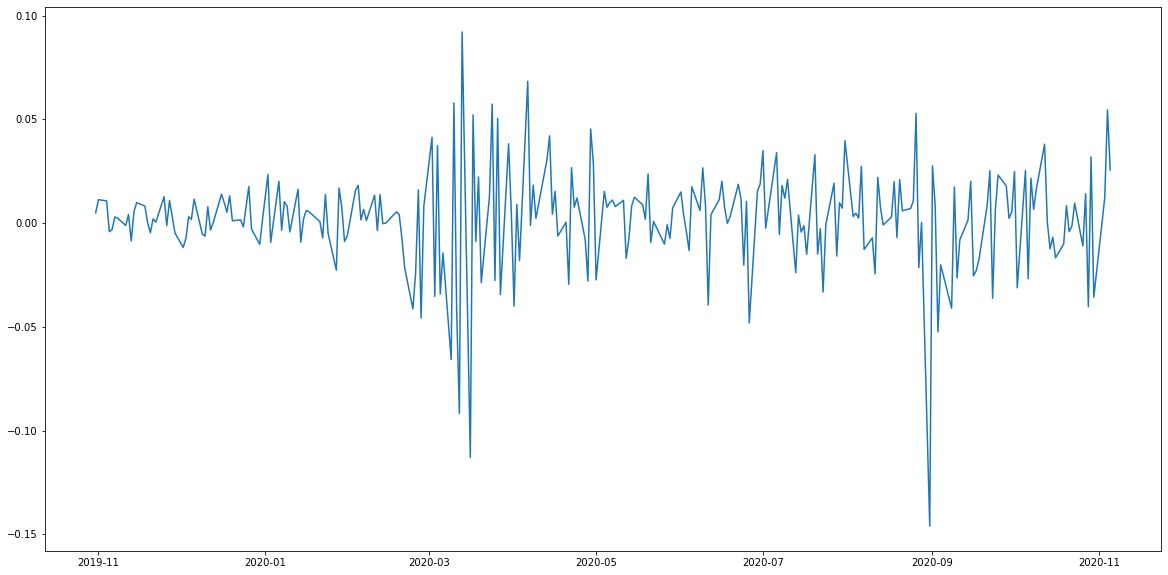

In [15]:

GLD = float(input("ENTER WEIGHT OF Gold"))
SNP = float(input("ENTER WEIGHT OF sp500"))
VNQ = float(input("ENTER WEIGHT OF VNQ"))
BTC = float(input("ENTER WEIGHT OF Bitcoin"))
FNG= float(input("ENTER WEIGHT OF FAANG"))

if GLD + SNP + VNQ + BTC + FNG == 1:
    portfolio_weights = [GLD, SNP, VNQ, BTC, FNG]

    portfolio_return = current_changes.dot(portfolio_weights)

    portfolio_return.plot(figsize = (20, 10))

else:
    print("Adjust your inputs. Total weight must equal 1")

portfolio_weights

[0.2, 0.2, 0.2, 0.2, 0.2]

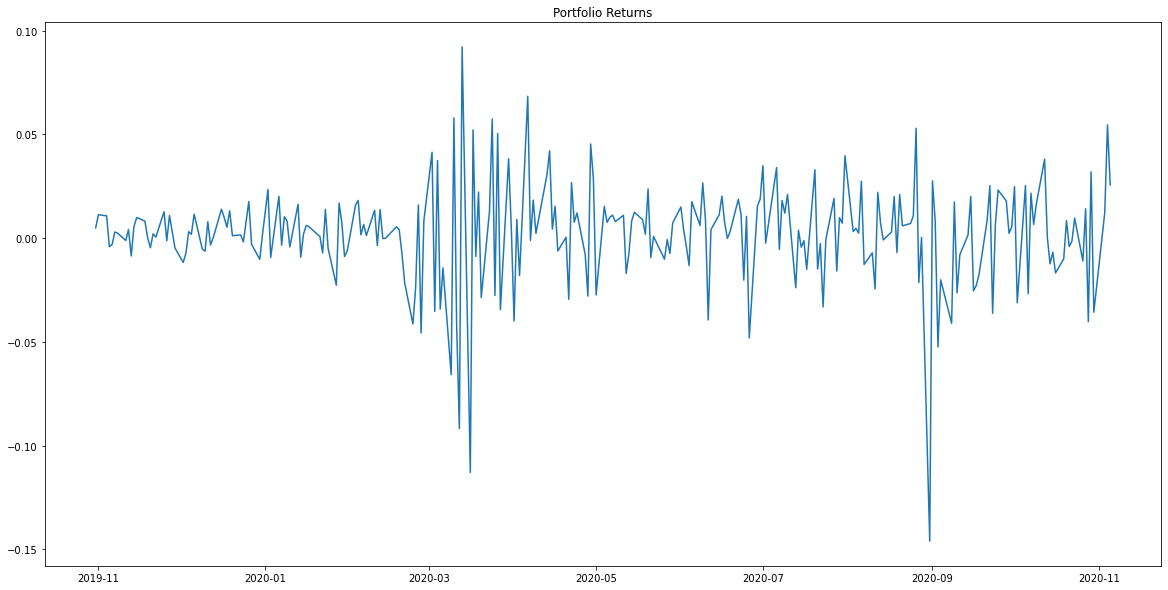

In [16]:
GLD = float(input("ENTER WEIGHT OF Gold"))
SNP = float(input("ENTER WEIGHT OF sp500"))
VNQ = float(input("ENTER WEIGHT OF VNQ"))
BTC = float(input("ENTER WEIGHT OF Bitcoin"))
FNG= float(input("ENTER WEIGHT OF FAANG"))

if GLD + SNP + VNQ + BTC + FNG == 1:
    portfolio_weights = [GLD, SNP, VNQ, BTC, FNG]

    portfolio_return = current_changes.dot(portfolio_weights)

    portfolio_return.plot(figsize = (20, 10), title="Portfolio Returns")

else:
    print("Adjust your inputs. Total weight must equal 1")

portfolio_weights

In [17]:
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from panel.interact import interact
from pathlib import Path
from dotenv import load_dotenv
pn.extension("plotly")

%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

In [18]:
load_dotenv()
mapbox_api_key = os.getenv("MAPBOX_API")

px.set_mapbox_access_token(mapbox_api_key)

NameError: name 'px' is not defined

In [19]:
type(mapbox_api_key)

NoneType

In [20]:
GLD = float(input("ENTER WEIGHT OF Gold"))
SNP = float(input("ENTER WEIGHT OF sp500"))
VNQ = float(input("ENTER WEIGHT OF VNQ"))
BTC = float(input("ENTER WEIGHT OF Bitcoin"))
FNG= float(input("ENTER WEIGHT OF FAANG"))

if GLD + SNP + VNQ + BTC + FNG == 1:
    portfolio_weights = [GLD, SNP, VNQ, BTC, FNG]

    portfolio_return = current_changes.dot(portfolio_weights)

    portfolio_return.hvplot.line(title="Portfolio Return", x="Date", y="portfolio_weights")

else:
    print("Adjust your inputs. Total weight must equal 1")

portfolio_weights

AttributeError: 'Series' object has no attribute 'hvplot'

In [21]:
line_plot = current_changes.hvplot.line(title="Average price per Square Foot in San Francisco", x="year", y="sale_price_sqr_foot")

line_plot

AttributeError: 'DataFrame' object has no attribute 'hvplot'